In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from sklearn.metrics import classification_report,multilabel_confusion_matrix,confusion_matrix 
from sklearn.metrics import f1_score,accuracy_score
from matplotlib.lines import Line2D



TSP RESULT ANALYSIS

In [2]:
tsp_instances_res_path = "/selectedset-TSP.csv"
gc_instances_res_path = "/GC-Results-LFvsDSATUR.csv"
TSPTextResults_path_norm = "/TSPText-old/TSPTextResults.csv"

TSPTextResults_path = "/TSPText/TSPTextResults.csv"
GCTextResults_path = "/GCText/GCTextResults.csv"
KPTextResults_path = "/KPText/KPTextResults.csv"
ALLTextResults_path =  "/ALLText/ALLTextResults.csv"

TSPImageResults_path = "/TSPImages/TSPImagesResults.csv"
GCImageResults_path = "/GCImages/GCImagesResults.csv"
KPImageResults_path = "/KPImages/KPImagesResults.csv"
ALLImagesResults_path = "/ALLImages/ALLImagesResults.csv"

ALLGraphsResults_path = "/ALLGraphs/ALLGraphsResults.csv"
TSPGraphsResults_path = "/TSP2GraphsResults.csv"


In [3]:
# Change the path to generate the tables for each representations
#df_TSPMLResults = pd.read_csv(TSPTextResults_path)
currentPath = ALLGraphsResults_path
df_MLResults = pd.read_csv(currentPath)
df_MLResults.head()

,Unnamed: 0,fold0,fold0-Y,fold0-Prediction,fold1,fold1-Y,fold1-Prediction,fold2,fold2-Y,fold2-Prediction,...,fold6-Prediction,fold7,fold7-Y,fold7-Prediction,fold8,fold8-Y,fold8-Prediction,fold9,fold9-Y,fold9-Prediction
0,0,LF/115-2083r318,5,2,Expknap/26_knapPI_1_50_10000_1,3,3,Combo/QuadFi,1,1,...,3,DSATUR/119-6874r145,2,2,LF/134-279r739,5,5,DSATUR/108-369r769,2,5
1,1,Expknap/0_knapPI_9_500_1000_1,3,3,Combo/CubeFi,1,1,Expknap/12_knapPI_4_500_1000000_1,3,3,...,0,Combo/EvenOddSubsetSu,1,1,Expknap/4_knapPI_4_100_10000000_1,3,3,DSATUR/59-1625r890,2,2
2,2,Expknap/49_knapPI_4_100_10000000_1,3,3,GREEDY/TSP-189-1-1-1690,4,4,DSATUR/78-1729r510,2,2,...,1,Expknap/43_knapPI_5_100_1000_1,3,3,GREEDY/TSP-175-10-0-5520,4,4,CHR/TSP-134-4-3-3326,0,0
3,3,CHR/TSP-32-10-0-678,0,0,DSATUR/172-14174r61,2,2,Combo/QuadFi,1,1,...,1,DSATUR/67-1081r236,2,2,GREEDY/TSP-137-8-0-3644,4,4,LF/15-21r534,5,5
4,4,GREEDY/TSP-199-9-0-3558,4,4,LF/96-4369r594,5,2,Expknap/44_knapPI_11_100_1000_1,3,3,...,0,GREEDY/TSP-75-10-1-2303,4,0,DSATUR/180-8125r122,2,2,Expknap/30_knapPI_3_1000_100000_1,3,1


In [ ]:
macrof1s = []
f1s = []
for i in range(10): 
  df_fold = df_MLResults[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']]  
  report = classification_report(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  #print(report)
  avgf1 = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist(), average = 'macro')
  macrof1s.append(avgf1)
  f1 = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist(), average = None)
  f1s.append(f1)

print("F1s Results for: " + currentPath.split('/')[-1][:-11])
print(f1s)
print(sum(f1s)/10)
print(sum(macrof1s)/10)
print(np.std(macrof1s))
## LABELS 0 CHR 1 COMBO 2 DSATUR 3 Expnap 4 GREEDY 5 LF

F1s Results for: KPImages
[array([0.93023256, 0.92561983]), array([0.91187739, 0.90376569]), array([0.93634497, 0.93957115]), array([0.93560606, 0.9279661 ]), array([0.91187739, 0.90376569]), array([0.91938998, 0.93160813]), array([0.92397661, 0.91991786]), array([0.92397661, 0.91991786]), array([0.92395437, 0.91561181]), array([0.91585127, 0.91206544])]
[0.92330872 0.91998096]
0.9216448399879258
0.009317587977746459


In [ ]:
def resultStats(results_DF):
  folds_n = 10
  macrof1s = []
  f1s = []
  accuracies = []
  for i in range(folds_n): 
    df_fold = results_DF[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']] 

    accuracies.append(accuracy_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist()))
    avgf1s = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist(), average = 'macro')
    macrof1s.append(avgf1s)
    f1 = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist(), average = None)
    f1s.append(f1)
  
  meanAcc = sum(accuracies)/folds_n
  Accstd = np.std(accuracies)
  meanmf1 = sum(macrof1s)/folds_n
  mf1std = np.std(macrof1s)
  singleMeanF1s = sum(f1s)/10
  singleMeanF1sstd = np.std(f1s,axis=0)
  print(sum(f1s)/10)

  return [meanAcc,Accstd,meanmf1,mf1std,singleMeanF1s,singleMeanF1sstd]






In [ ]:
representations = ["Text","Images","Graphs"]
domains = ["TSP","KP","GC","ALL"]
mainDir = "/"
# Mean Macro F1 across folds
columns= ["Representation","Domain", "Accuracy %", "St.d.","F1-Score","St.d"]
macroF1s = []
for rep in representations:
  for dom in domains:
    results_path = mainDir+dom+rep+'/'+dom+rep+'Results.csv'
    if os.path.isfile(results_path): 
      df_Results = pd.read_csv(results_path)
      print(f'results for {dom}{rep}')
      res = resultStats(df_Results)
      macroF1s.append([rep,dom,res[0]*100,res[1]*100,res[2],res[3]])
    else:
      print(f'File for {dom}{rep} Missing')
      macroF1s.append([rep,dom,0,0,0,0])

MacroF1_DF = pd.DataFrame(macroF1s, columns=columns)
MacroF1_DF[["Accuracy %", "St.d.","F1-Score","St.d"]] = MacroF1_DF[["Accuracy %", "St.d.","F1-Score","St.d"]].astype('float').round(2)
MacroF1_DF.to_csv("mf1.csv",index=False)
MacroF1_DF.to_latex("mf1.tex",index=False)
MacroF1_DF
#Per solver F1


results for TSPText
[0.58800637 0.61664325]
results for KPText
[0.92302777 0.92976329]
results for GCText
[0.63314742 0.64709267]
results for ALLText
[0.41260143 0.89544638 0.63472671 0.83073053 0.61934742 0.6162014 ]
results for TSPImages
[0.71587344 0.71873777]
results for KPImages
[0.92330872 0.91998096]
results for GCImages
[0.71198589 0.68382965]
results for ALLImages
[0.69211682 0.920954   0.71273926 0.9196178  0.71592303 0.6757397 ]
results for TSPGraphs
[0.64921552 0.6668095 ]
results for KPGraphs
[0.89522827 0.8848547 ]
results for GCGraphs
[0.72584121 0.69214218]
results for ALLGraphs
[0.65220593 0.86730104 0.72665859 0.85401871 0.62125756 0.61549527]


,Representation,Domain,Accuracy %,St.d.,F1-Score,St.d
0,Text,TSP,60.38,2.47,0.60,0.02
1,Text,KP,92.66,1.04,0.93,0.01
2,Text,GC,64.08,2.56,0.64,0.03
3,Text,ALL,67.49,1.10,0.67,0.01
4,Images,TSP,71.80,1.75,0.72,0.02
5,Images,KP,92.18,0.93,0.92,0.01
6,Images,GC,69.96,2.21,0.70,0.02
7,Images,ALL,77.40,1.15,0.77,0.01
8,Graphs,TSP,65.92,2.72,0.66,0.03
9,Graphs,KP,89.04,1.34,0.89,0.01


In [ ]:
f1s = []
f1sstd = []
mtF1s = []
mtF1sstd = []
for rep in representations:
  repF1s = []
  repF1sstd = []
  for dom in domains:
    results_path = mainDir+dom+rep+'/'+dom+rep+'Results.csv'
    if os.path.isfile(results_path): 
      avgsF1 = []      
      df_Results = pd.read_csv(results_path)
      res = resultStats(df_Results) 
      if dom != 'ALL':     
        repF1s = repF1s + res[4].tolist()
        repF1sstd = repF1sstd + res[5].tolist()
      else:
        mt = res[4].tolist()  ## LABELS 0 CHR 1 COMBO 2 DSATUR 3 Expnap 4 GREEDY 5 LF
        mtF1s.append([mt[0], mt[4], mt[1], mt[3], mt[2],mt[5]]) ## LABELS 0 CHR 1 GREEDY 2 COMBO 3 Expnap 4 DSATUR 5 LF 
        mtstd = res[5].tolist()
        mtF1sstd.append([mtstd[0], mtstd[4], mtstd[1], mtstd[3], mtstd[2],mtstd[5]])
    else:
      print(f'File for {dom}{rep} Missing')
      macroF1s.append([rep,dom,0,0,0,0])
  f1s.append(repF1s)
  f1sstd.append(repF1sstd)

f1s = np.around(f1s, decimals =2)
f1sstd = np.around(f1sstd, decimals =2)
mtF1s = np.around(mtF1s, decimals =2)
mtF1sstd = np.around(mtF1sstd, decimals =2)

[0.58800637 0.61664325]
[0.92302777 0.92976329]
[0.63314742 0.64709267]
[0.41260143 0.89544638 0.63472671 0.83073053 0.61934742 0.6162014 ]
[0.71587344 0.71873777]
[0.92330872 0.91998096]
[0.71198589 0.68382965]
[0.69211682 0.920954   0.71273926 0.9196178  0.71592303 0.6757397 ]
[0.64921552 0.6668095 ]
[0.89522827 0.8848547 ]
[0.72584121 0.69214218]
[0.65220593 0.86730104 0.72665859 0.85401871 0.62125756 0.61549527]


In [ ]:
columns= ["Domain", "Solver", "Features", "T-S", "T-M", "I-S", "I-M","G-S", "G-M"]
F1s_DF = pd.DataFrame(columns=columns)
F1s_DF["Domain"] = ["TSP","TSP", "KP","KP","GC","GC"]
F1s_DF["Solver"] = ["CHR", "GRD", "CMB", "EXP" ,"DST", "LF"]
F1s_DF["Features"] = np.array(['0.99(0.01)','0.99(0.01)','0.90(0.01)','0.97(0.01)','0.70(0.01)','0.69(0.01)']) 
F1s_DF["T-S"] = [f'{val}({std})' for val,std in zip(f1s[0],f1sstd[0])]
F1s_DF["T-M"] = [f'{val}({std})' for val,std in zip(mtF1s[0],mtF1sstd[0])]
F1s_DF["I-S"] = [f'{val}({std})' for val,std in zip(f1s[1],f1sstd[1])]
F1s_DF["I-M"] = [f'{val}({std})' for val,std in zip(mtF1s[1],mtF1sstd[1])]
F1s_DF["G-S"] = [f'{val}({std})' for val,std in zip(f1s[2],f1sstd[2])]
F1s_DF["G-M"] = [f'{val}({std})' for val,std in zip(mtF1s[2],mtF1sstd[2])]
#F1s_DF[["T-S", "T-M", "I-S", "I-M","G-S", "G-M"]] = F1s_DF[["T-S", "T-M", "I-S", "I-M","G-S", "G-M"]].astype('float').round(3)
F1s_DF.to_csv("f1s.csv",index=False)
F1s_DF.to_latex("f1s.tex",index=False)

In [4]:
df_tsp_instances = pd.read_csv(tsp_instances_res_path)

In [ ]:
df_tsp_instances

,Unnamed: 0,FileName,Label,TourLength0,Time0,TourLength1,Time1,Tdiff,newLabel
0,0,TSP-28-7-1-0.csv,0,4.853,0.004164,4.929,0.000186,0.003978,0
1,1,TSP-98-4-1-1.csv,0,5.447,0.079665,6.539,0.002217,0.077448,0
2,2,TSP-60-5-0-2.csv,0,4.138,0.036374,4.756,0.000506,0.035869,0
3,3,TSP-115-3-1-3.csv,0,6.293,0.211977,6.564,0.002435,0.209542,1
4,4,TSP-79-5-2-4.csv,0,3.167,0.002327,3.212,0.000087,0.002240,0
...,...,...,...,...,...,...,...,...,...
4995,4995,TSP-82-8-0-5863.csv,0,5.661,0.100682,5.829,0.001073,0.099609,1
4996,4996,TSP-53-9-2-5867.csv,1,4.535,0.005657,4.139,0.000244,0.005413,1
4997,4997,TSP-81-7-2-5869.csv,1,4.141,0.006119,4.002,0.000203,0.005916,1
4998,4998,TSP-135-8-0-5874.csv,0,5.823,0.190543,6.931,0.002592,0.187951,1


In [ ]:
# score = tourlength + Time.rescaled(0,smallestPositiveTourDiff)
tourValues = list(df_tsp_instances['TourLength0'].values)# + list(df_tsp_instances['TourLength1'].values)
tourValues.extend(list(df_tsp_instances['TourLength1'].values))
print(tourValues)

[4.853, 5.447, 4.138, 6.293, 3.167, 6.368, 3.094, 3.177, 7.357, 4.853, 4.124, 3.747, 3.253, 3.123, 6.637, 7.217, 4.853, 5.202, 6.863, 4.377, 4.156, 6.42, 4.965, 5.46, 4.269, 3.858, 6.047, 5.727, 6.055, 5.211, 4.639, 5.886, 4.853, 5.431, 6.029, 8.638, 4.817, 5.602, 7.305, 5.657, 6.668, 6.142, 7.232, 4.42, 7.573, 5.98, 5.841, 5.242, 5.459, 5.384, 5.397, 4.914, 5.922, 4.417, 6.732, 5.543, 6.741, 4.731, 5.244, 6.36, 6.071, 5.895, 4.777, 5.74, 6.547, 3.475, 3.881, 6.006, 6.111, 4.211, 5.245, 6.869, 5.089, 4.613, 4.34, 5.484, 5.018, 4.678, 5.13, 3.629, 5.549, 3.644, 5.782, 4.442, 5.072, 3.534, 3.882, 4.982, 6.215, 5.409, 5.762, 7.915, 6.114, 5.801, 5.193, 6.122, 7.587, 5.901, 4.186, 4.796, 5.255, 6.889, 4.808, 5.681, 5.246, 3.852, 4.229, 7.123, 4.186, 5.099, 4.717, 5.985, 6.428, 4.956, 5.512, 4.497, 5.811, 6.289, 4.95, 3.724, 5.264, 6.317, 4.705, 5.504, 4.019, 4.405, 5.569, 5.817, 5.245, 7.12, 5.846, 6.247, 5.656, 5.981, 5.79, 5.066, 4.92, 6.968, 10.844, 4.311, 8.324, 4.842, 5.067, 3.909, 4.

In [ ]:
sTour = sorted(tourValues)
worstTour = max(sTour)
minPositiveDiff = max(sTour)
for index, t in enumerate(sTour[:-1]):
  diff = abs(t - sTour[index+1])
  if 0 < diff < minPositiveDiff:
    minPositiveDiff = diff
  
print(minPositiveDiff)

0.0009999999999994458


In [ ]:
from sklearn import preprocessing
autoscaler = preprocessing.MinMaxScaler((0,minPositiveDiff))


In [ ]:
df_tsp_instances['Time0Scaled'] = autoscaler.fit_transform(df_tsp_instances['Time0'].values.reshape(-1,1))
df_tsp_instances['Time1Scaled'] = autoscaler.fit_transform(df_tsp_instances['Time1 '].values.reshape(-1,1))

In [ ]:
df_tsp_instances.head()

,Unnamed: 0,FileName,Label,TourLength0,Time0,TourLength1,Time1,Tdiff,newLabel,Time0Scaled,Time1Scaled
0,0,TSP-28-7-1-0.csv,0,4.853,0.004164,4.929,0.000186,0.003978,0,3.301996e-06,1.322841e-05
1,1,TSP-98-4-1-1.csv,0,5.447,0.079665,6.539,0.002217,0.077448,0,9.856515e-05,2.693603e-04
2,2,TSP-60-5-0-2.csv,0,4.138,0.036374,4.756,0.000506,0.035869,0,4.394355e-05,5.351896e-05
3,3,TSP-115-3-1-3.csv,0,6.293,0.211977,6.564,0.002435,0.209542,1,2.655098e-04,2.968133e-04
4,4,TSP-79-5-2-4.csv,0,3.167,0.002327,3.212,0.000087,0.002240,0,9.846686e-07,7.061880e-07


In [ ]:
# f1 score any result file
## LABELS 0 CHR 1 COMBO 2 DSATUR 3 Expnap 4 GREEDY 5 LF
f1s = []
for i in range(10): 
  df_fold = df_MLResults[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']]  
  report = classification_report(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  #print(report)
  f1 = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist(), average = None)
  #print("conf matrix")
  #print(confusion_matrix(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist()))
  cm = confusion_matrix(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  cm_df = pd.DataFrame(cm,range(6),range(6))
  #sns.set(font_scale=1.4) 
  #sns.heatmap(cm_df, annot=True, annot_kws={"size": 16}, cmap="Blues",fmt='d') 
  #plt.show()
  f1s.append(f1)
print(f1s)
print(sum(f1s)/10)


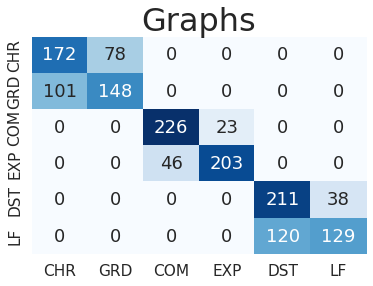

In [ ]:
# ALL Labels at once Confusion Matrix
## LABELS 0 CHR 1 COMBO 2 DSATUR 3 Expnap 4 GREEDY 5 LF
## turned into 0CHR 1GRD,  2COMBO 3EXP 4DSatur 5LF,
f1s = []
nlabels = int(df_MLResults['fold0-Y'].nunique())
totalcm = np.zeros((nlabels,nlabels))
for i in range(10): 
  df_fold = df_MLResults[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']]  
  report = classification_report(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  #print(report)
  f1 = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist(), average = None)
  #print("conf matrix")
  #print(confusion_matrix(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist()))
  cm = confusion_matrix(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  totalcm = np.add(totalcm,cm)  
  f1s.append(f1)
#print(f1s)
#print(sum(f1s)/10)
# rotating row and columsn to put domains close to each other
#
totalcm[:, [1, 2]] = totalcm[:, [2, 1]]
totalcm[[1, 2]] = totalcm[[2, 1]]
totalcm[[1, 4]] = totalcm[[4, 1]]
totalcm[:, [1, 4]] = totalcm[:, [4, 1]]

#Heuristics = ["CHR", "COM", "DST", "Exp", "GRD", "LF"]
Heuristics = ["CHR", "GRD","COM", "EXP" , "DST", "LF"]

ax = plt.axes()
cm_df = pd.DataFrame(totalcm/10,Heuristics,Heuristics).astype(int)
sns.set(font_scale=1.4) 
sns.heatmap(cm_df, annot=True, annot_kws={"size": 18}, cmap="Blues",fmt='d',ax = ax, cbar=False) 
ax.set_title('Graphs', fontsize =32)
plt.savefig("GconfMatrix.png", dpi=600 , bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

In [ ]:
# lexicographic method with autoscaling score (LMAC)
folds = []
totals = []
VBS = []
reports = []
f1s = []
for i in range(10): 
  totalTime0=0
  totalTime1=0
  totalLength0=0
  totalLength0WCL=0
  totalLength1=0
  chrTimeouts =0
  VBSTime=0
  VBSLength=0
  TextNNtime=0
  TextNNLength=0

  CHRtotalScore = 0
  CHRscores = []
  GDRtotalScore = 0
  GDRscores =[]
  VBSScore=0
  VBSscores =[]
  NNScore =0
  NNscores = []
  NNLtimeout =0 # NN selection leads to timeout

  df_fold = df_MLResults[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']]
  folds.append(df_fold)
  report = classification_report(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  reports.append(report)
  f1 = f1_score(df_fold[f'fold{i}-Y'].tolist(),df_fold[f'fold{i}-Prediction'].tolist())
  f1s.append(f1)

  for index, row in df_fold.iterrows():
    instance_name = row[f'fold{i}'].split("/")[-1]
    if instance_name[-4:] != ".csv":
      instance_name = instance_name + '.csv'
    instance_res = df_tsp_instances.loc[df_tsp_instances['FileName'] == instance_name]
    if len(instance_res) == 0:
      print("Instance not found")
      print(instance_name)
      break
    totalTime0+=instance_res['Time0'].values[0]
    totalTime1+=instance_res['Time1 '].values[0]
    totalLength0+=instance_res['TourLength0'].values[0]
    totalLength1+=instance_res['TourLength1'].values[0]
    #worstTour = instance_res['TourLength1'].values[0]*2
    if instance_res['Time0'].values[0] > 0.095:
      chrTimeouts+=1
      VBSTime += instance_res['Time1 '].values[0] 
      VBSLength += instance_res['TourLength1'].values[0]
      #totalLength0WCL += instance_res['TourLength1'].values[0] *2  # Worst Case Length *10 - WCL10  
      VBSScore += instance_res['TourLength1'].values[0] + instance_res['Time1Scaled'].values[0] 
      CHRtotalScore += worstTour + instance_res['Time0Scaled'].values[0] 
      GDRtotalScore += instance_res['TourLength1'].values[0] + instance_res['Time1Scaled'].values[0] 

    elif instance_res['TourLength0'].values[0] > instance_res['TourLength1'].values[0]:
      VBSTime += instance_res['Time1 '].values[0] 
      VBSLength += instance_res['TourLength1'].values[0]
      #totalLength0WCL += instance_res['TourLength0'].values[0]
      VBSScore += instance_res['TourLength1'].values[0] + instance_res['Time1Scaled'].values[0] 
      CHRtotalScore += instance_res['TourLength0'].values[0] + instance_res['Time0Scaled'].values[0] 
      GDRtotalScore += instance_res['TourLength1'].values[0] + instance_res['Time1Scaled'].values[0] 
    else:
      VBSTime += instance_res['Time0'].values[0] 
      VBSLength += instance_res['TourLength0'].values[0]   
      #totalLength0WCL += instance_res['TourLength0'].values[0]
      VBSScore += instance_res['TourLength0'].values[0] + instance_res['Time0Scaled'].values[0] 
      CHRtotalScore += instance_res['TourLength0'].values[0] + instance_res['Time0Scaled'].values[0] 
      GDRtotalScore += instance_res['TourLength1'].values[0] + instance_res['Time1Scaled'].values[0]  

    predicted = row[f'fold{i}-Prediction']
    if predicted == 0:
      if instance_res['Time0'].values[0] > 0.095:
        TextNNtime += 0.2
        #TextNNLength += instance_res['TourLength1'].values[0] *2  # Worst Case Length *10 - WCL10 
        NNScore += worstTour + instance_res['Time0Scaled'].values[0]
        NNLtimeout +=1
      else:
        TextNNtime += instance_res['Time0'].values[0] 
        TextNNLength += instance_res['TourLength0'].values[0]  
        NNScore += instance_res['TourLength0'].values[0] + instance_res['Time0Scaled'].values[0] 
    else:
      TextNNtime += instance_res['Time1 '].values[0] 
      TextNNLength += instance_res['TourLength1'].values[0]
      NNScore += instance_res['TourLength1'].values[0] + instance_res['Time1Scaled'].values[0]



  totals.append([totalTime0,totalTime1,totalLength0,totalLength1,chrTimeouts, VBSTime, VBSLength, TextNNtime,TextNNLength, VBSScore,CHRtotalScore,GDRtotalScore,NNScore,NNLtimeout])
    #print(instance_res['Time1 '])
  #df_fold.head()

print(totals)

[[50.41885099999925, 1.0130162000000709, 2688.315, 2898.0400000000013, 165, 9.50157290000036, 2792.483999999999, 16.52562220000056, 2494.3599999999988, 2792.582523193586, 3783.550640015928, 2898.1626265400528, 3144.605625618233, 50], [55.252025899999616, 1.0306875999993068, 2691.8290000000006, 2913.261000000001, 174, 8.784724600000363, 2812.636000000001, 15.33825199999972, 2516.750000000002, 2812.737249435823, 3824.6527382676595, 2913.3858549918627, 3140.99810096918, 48], [48.89182310000088, 0.9818719000011071, 2677.0160000000024, 2898.0169999999985, 160, 9.485030300000883, 2788.658999999999, 15.095808100000898, 2521.783999999999, 2788.753710891515, 3729.5257132905936, 2898.1356990882578, 3094.0150106683664, 44], [51.91287780000066, 1.0189225999996028, 2718.9240000000023, 2942.1919999999996, 165, 9.13689050000008, 2823.1280000000006, 15.54665250000031, 2537.5720000000006, 2823.2273100744787, 3808.895525102172, 2942.315371366598, 3187.821043047779, 50], [54.69296790000004, 1.04758149999

In [ ]:
print(sum(f1s)/10)

0.6711684655666865


In [ ]:
totals_frame = pd.DataFrame(totals, columns=['CHR-Time','GrdTime','CHR-Len*','GrdLen','CHR-TO', "VBSTime" , "VBSLength" , "NNTime","NNLength", "VBSScore","CHRScore","GDRscore","NNscore","NNLtimeout"])
totals_frame = totals_frame.round(2)
totals_frame.to_latex("vbs-sbs")
totals_frame.to_csv("txt-TSP-vbs-sbs3.csv")

In [ ]:
for r in reports:
  print(r['f1-score'] == 'macro avg')

In [ ]:
instance_res = df_tsp_instances.loc[df_tsp_instances['FileName'] == 'TSP-69-10-0-4468.csv']
print(instance_res)

Empty DataFrame
Columns: [Unnamed: 0, FileName, Label, TourLength0, Time0, TourLength1, Time1 , Tdiff, newLabel, Time0Scaled, Time1Scaled]
Index: []


In [ ]:
print(df_tsp_instances.loc[df_tsp_instances['Time0'] == 0.0050764])

Empty DataFrame
Columns: [Unnamed: 0, FileName, Label, TourLength0, Time0, TourLength1, Time1 , Tdiff, newLabel, Time0Scaled, Time1Scaled]
Index: []


In [ ]:
df_fold0_test = df_TSPTextResults[["fold0","fold0-Y","fold0-Prediction"]]
totalTime0=0
totalTime1=0
totalLength0=0
totalLength1=0
for index, row in df_fold0_test.iterrows():
    instance_name = row["fold0"].split("/")[1]
    instance_res = df_tsp_instances.loc[df_tsp_instances['FileName'] == instance_name]
    if len(instance_res['Time1 ']) <1:
      print(instance_name)
      break
    totalTime0+=instance_res['Time0'].values[0]
    totalTime1+=instance_res['Time1 '].values[0]
    totalLength0+=instance_res['TourLength0'].values[0]
    totalLength1+=instance_res['TourLength1'].values[0]
    #print(instance_res['Time1 '].values[0])

In [ ]:
print(totalTime0)
print(totalTime1)
print(totalLength0)
print(totalLength1) 

48.85004800000127
0.9204919999996303
2664.2749999999974
2867.553


In [ ]:
totals_frame = totals_frame.round(2)
totals_frame.head()

,CHR-Time,GreedyTime,CHR-Length*,GreedyLength,CHRTimeouts(Out of 500),VBSTime,VBSLength
0,48.85,0.92,2664.27,2867.55,150,8.98,2765.94
1,50.51,0.99,2683.59,2898.60,167,8.90,2793.60
2,54.16,1.04,2679.16,2906.63,182,9.04,2802.29
3,48.86,0.94,2659.74,2850.45,162,8.04,2753.74
4,50.78,0.97,2673.77,2880.04,157,8.90,2776.45


In [ ]:
totals_frame.to_latex("TSP_VBS_table.tex")

Text(0, 0.5, 'Tour Length')

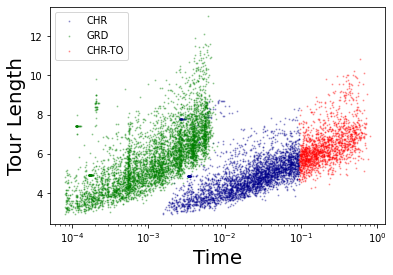

In [ ]:
ax1 = df_tsp_instances[df_tsp_instances['Time0'] <0.095].plot.scatter(x='Time0' , y='TourLength0', c='DarkBlue',alpha=0.3, s=1)
ax2 = df_tsp_instances.plot.scatter(x='Time1 ', y='TourLength1', color='g',s=1, alpha=0.3,ax=ax1)  
ax1 = df_tsp_instances[df_tsp_instances['Time0'] >0.095].plot.scatter(x='Time0' , y='TourLength0', c='r', s=1 ,alpha=0.3, ax=ax1)
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(["CHR" , "GRD" , "CHR-TO"])
plt.xlabel("Time", size =20)
plt.ylabel("Tour Length" ,size = 20)
#print(instance_res['Time0'].min())
#print(instance_res['Time0'].max())
#ax1.set_xlim(instance_res['Time0'].min(), instance_res['Time0'].max())

Text(0, 0.5, 'Tour Length')

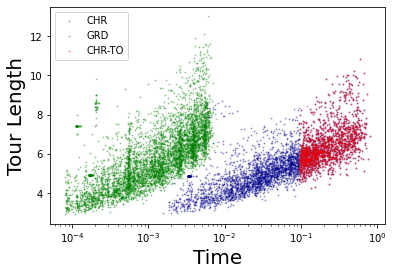

In [ ]:
ax1 = df_tsp_instances[df_tsp_instances['Time0'] <0.095].plot.scatter(x='Time0' , y='TourLength0', c='DarkBlue',alpha=0.3, s=1)
ax2 = df_tsp_instances.plot.scatter(x='Time1 ', y='TourLength1', color='g',s=1, alpha=0.3,ax=ax1)  
ax1 = df_tsp_instances[df_tsp_instances['Time0'] >0.095].plot.scatter(x='Time0' , y='TourLength0', c='r', s=1 ,alpha=0.3, ax=ax1)
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(["CHR" , "GRD" , "CHR-TO"])
plt.xlabel("Time", size =20)
plt.ylabel("Tour Length" ,size = 20)


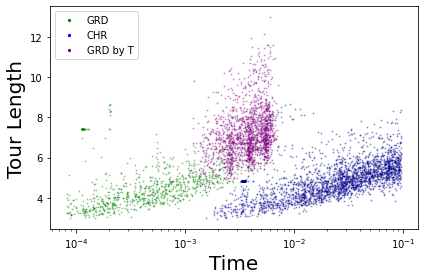

In [6]:
chrWin  = df_tsp_instances[df_tsp_instances['TourLength0'] < df_tsp_instances['TourLength1']]
chrWin = chrWin[chrWin['Time0'] <0.095]
ax1 = chrWin.plot.scatter(x='Time0' , y='TourLength0', c='DarkBlue',alpha=0.3, s=1)
ax2 = df_tsp_instances[df_tsp_instances['TourLength0'] > df_tsp_instances['TourLength1']].plot.scatter(x='Time1 ', y='TourLength1', color='g',s=1, alpha=0.3,ax=ax1) 
#ax3 = df_tsp_instances[df_tsp_instances['Time0'] >0.095].plot.scatter(x='Time0' , y='TourLength0', c='r', s=1 ,alpha=0.3, ax=ax1)
ax4 = df_tsp_instances[df_tsp_instances['Time0'] >0.095].plot.scatter(x='Time1 ' , y='TourLength1', c='purple', s=1 ,alpha=0.3, ax=ax1)
ax1.set_xscale('log')
#ax1.legend(["CHR" , "GRD" , "CHR-TO"])
h1 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='g', linestyle='None')
h2 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='b', linestyle='None')
h3 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='purple', linestyle='None')
plt.legend([h1, h2, h3], ["GRD" , "CHR" , "GRD by T"], loc="upper left", markerscale=0.5,
           scatterpoints=1, fontsize=10)
plt.xlabel("Time", size =20)
plt.ylabel("Tour Length" ,size = 20)
plt.savefig("TSPinstances.png", dpi=600 , bbox_inches='tight')
plt.tight_layout()

In [ ]:
print(instance_res['Time0'])

2726    0.001254
Name: Time0, dtype: float64


In [ ]:
df_fold.head()

,fold9,fold9-Y,fold9-Prediction
0,CHR/TSP-38-5-2-1254.csv,0,0.0
1,GREEDY/TSP-115-3-0-1574.csv,1,1.0
2,CHR/TSP-77-3-1-865.csv,0,1.0
3,CHR/TSP-60-2-3-4007.csv,0,0.0
4,CHR/TSP-26-8-2-2929.csv,0,0.0


GRAPH COLOURING RESULT ANALYSIS

In [7]:
gc_instances_res_path = "/content/drive/MyDrive/Colab Notebooks/GECCO-2022/PPSN/GC-Results-LFvsDSATUR.csv"
gcTextResults_path = "/GCText/GCTextResults.csv"


In [8]:
df_gc_instances = pd.read_csv(gc_instances_res_path)

In [ ]:
df_gc_instances.head()

,FileName,Label,Colours0,Time0,Colours1,Time1
0,128-7689r328,1,62,0.001781,59,0.022065
1,175-3272r392,1,14,0.001135,12,0.036873
2,100-4587r582,1,46,0.001122,43,0.014194
3,119-3058r978,1,19,0.001202,17,0.018467
4,21-64r593,1,4,0.000143,3,0.001012


In [ ]:
df_GCTextResults = pd.read_csv(gcTextResults_path)
df_GCTextResults.head()

,Unnamed: 0,fold0,fold0-Y,fold0-Prediction,fold1,fold1-Y,fold1-Prediction,fold2,fold2-Y,fold2-Prediction,...,fold6-Prediction,fold7,fold7-Y,fold7-Prediction,fold8,fold8-Y,fold8-Prediction,fold9,fold9-Y,fold9-Prediction
0,0,DSATUR/54-253r806.csv,1,2,DSATUR/96-2948r504.csv,1,2,DSATUR/63-884r836.csv,1,2,...,1,DSATUR/125-901r30.csv,1,1,LF/81-2951r189.csv,2,2,LF/28-215r716.csv,2,2
1,1,DSATUR/37-164r279.csv,1,2,LF/10-17r131.csv,2,2,LF/22-35r754.csv,2,2,...,1,DSATUR/170-12282r566.csv,1,1,DSATUR/163-1263r822.csv,1,2,LF/16-106r437.csv,2,2
2,2,DSATUR/48-902r690.csv,1,1,DSATUR/185-6750r900.csv,1,1,DSATUR/57-639r926.csv,1,2,...,2,DSATUR/172-849r162.csv,1,1,DSATUR/166-2826r274.csv,1,1,DSATUR/170-3607r873.csv,1,1
3,3,DSATUR/130-4024r725.csv,1,1,LF/169-1040r399.csv,2,1,LF/122-7374r197.csv,2,1,...,2,DSATUR/174-1525r108.csv,1,1,DSATUR/94-744r192.csv,1,1,DSATUR/122-2018r339.csv,1,1
4,4,DSATUR/164-4532r557.csv,1,1,LF/39-756r627.csv,2,2,LF/13-65r471.csv,2,2,...,2,LF/13-74r371.csv,2,2,DSATUR/85-1887r124.csv,1,2,DSATUR/108-3547r170.csv,1,1


In [ ]:

### OLD TABLE 
folds = []
totals = []
VBS = []
for i in range(10): 
  totalTime0=0
  totalTime1=0
  totalLength0=0
  totalLength0WCL=0
  totalLength1=0
  chrTimeouts =0
  VBSTime=0
  VBSLength=0
  TextNNtime=0
  TextNNLength=0
  df_fold = df_TSPTextResults[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']]
  folds.append(df_fold)
  
  for index, row in df_fold.iterrows():
    instance_name = row[f'fold{i}'].split("/")[1]
    instance_res = df_tsp_instances.loc[df_tsp_instances['FileName'] == instance_name]
    totalTime0+=instance_res['Time0'].values[0]
    totalTime1+=instance_res['Time1 '].values[0]
    totalLength0+=instance_res['TourLength0'].values[0]
    totalLength1+=instance_res['TourLength1'].values[0]
    if instance_res['Time0'].values[0] > 0.095:
      chrTimeouts+=1
      VBSTime += instance_res['Time1 '].values[0] 
      VBSLength += instance_res['TourLength1'].values[0]
      totalLength0WCL += instance_res['TourLength1'].values[0] *2  # Worst Case Length *10 - WCL10  
    elif instance_res['TourLength0'].values[0] > instance_res['TourLength1'].values[0]:
      VBSTime += instance_res['Time1 '].values[0] 
      VBSLength += instance_res['TourLength1'].values[0]
      totalLength0WCL += instance_res['TourLength0'].values[0]
    else:
      VBSTime += instance_res['Time0'].values[0] 
      VBSLength += instance_res['TourLength0'].values[0]   
      totalLength0WCL += instance_res['TourLength0'].values[0]

    predicted = row[f'fold{i}-Prediction']
    if predicted == 0:
      if instance_res['Time0'].values[0] > 0.095:
        TextNNtime += 0.2
        TextNNLength += instance_res['TourLength1'].values[0] *2  # Worst Case Length *10 - WCL10      
      else:
        TextNNtime += instance_res['Time0'].values[0] 
        TextNNLength += instance_res['TourLength0'].values[0]  
    else:
      TextNNtime += instance_res['Time1 '].values[0] 
      TextNNLength += instance_res['TourLength1'].values[0]




  totals.append([totalTime0,totalTime1,totalLength0,totalLength0WCL,totalLength1,chrTimeouts, VBSTime, VBSLength, TextNNtime,TextNNLength])
    #print(instance_res['Time1 '])
  #df_fold.head()

print(totals)

[[48.85004800000127, 0.9204919999996303, 2664.2749999999974, 3870.360999999996, 2867.553, 150, 8.983628700000427, 2765.936999999998, 5.658857899999813, 2867.270999999998], [50.51194019999981, 0.9932385999991871, 2683.5899999999983, 4011.230999999997, 2898.6029999999964, 167, 8.901533699999742, 2793.597, 5.667063500000094, 2905.7729999999983], [54.16310880000079, 1.0415452000002996, 2679.156999999999, 4106.021, 2906.6290000000004, 182, 9.036567800000736, 2802.288999999997, 6.327838000000348, 2912.302000000001], [48.86260099999966, 0.9357094000009851, 2659.738999999998, 3912.9039999999995, 2850.4519999999993, 162, 8.035087600000539, 2753.741999999997, 2.823430300000613, 2834.0489999999972], [50.77882690000072, 0.9748287000004409, 2673.769000000002, 3910.629, 2880.0440000000003, 157, 8.901707299999803, 2776.4530000000004, 4.602871300000506, 2876.078000000001], [51.088545000000266, 1.0148727000002307, 2669.8410000000013, 3986.6040000000016, 2895.818, 164, 9.335315100000866, 2789.2809999999

In [ ]:
# score = tourlength + Time.rescaled(0,smallestPositiveTourDiff)
colourValues = list(df_gc_instances['Colours0'].values)# + list(df_tsp_instances['TourLength1'].values)
colourValues.extend(list(df_gc_instances['Colours1'].values))
print(colourValues)

[62, 14, 46, 19, 4, 17, 45, 70, 58, 26, 30, 9, 17, 10, 35, 12, 30, 38, 92, 70, 25, 28, 64, 21, 9, 35, 13, 78, 33, 41, 5, 50, 63, 39, 7, 10, 11, 8, 8, 27, 9, 8, 17, 16, 36, 4, 34, 81, 7, 47, 25, 57, 40, 14, 22, 11, 33, 35, 31, 10, 13, 8, 11, 15, 31, 11, 17, 7, 35, 7, 32, 25, 23, 41, 42, 9, 14, 4, 34, 63, 12, 17, 37, 23, 19, 9, 64, 15, 42, 13, 21, 66, 5, 27, 67, 28, 59, 12, 11, 7, 20, 23, 11, 20, 43, 20, 33, 6, 33, 6, 8, 16, 29, 19, 19, 65, 36, 12, 32, 19, 52, 8, 21, 37, 43, 9, 8, 4, 9, 21, 28, 15, 19, 27, 7, 9, 8, 20, 17, 15, 24, 18, 3, 15, 19, 12, 8, 29, 17, 20, 46, 31, 3, 29, 16, 12, 28, 43, 28, 18, 18, 21, 38, 29, 7, 31, 41, 7, 78, 2, 7, 20, 4, 9, 12, 48, 30, 11, 43, 16, 4, 10, 20, 13, 26, 16, 17, 22, 15, 44, 17, 3, 14, 25, 22, 11, 17, 43, 9, 36, 24, 3, 23, 33, 17, 8, 15, 24, 40, 14, 22, 7, 33, 14, 28, 8, 28, 23, 3, 24, 40, 15, 9, 54, 15, 13, 26, 37, 16, 7, 18, 15, 10, 42, 6, 6, 15, 8, 19, 14, 21, 18, 20, 6, 10, 8, 69, 16, 36, 16, 10, 44, 27, 3, 54, 28, 13, 34, 42, 4, 16, 65, 24, 62,

In [ ]:
sColours = sorted(colourValues)
worstColouring = max(sColours)
minPositiveCDiff = max(sColours)
for index, t in enumerate(sColours[:-1]):
  diff = abs(t - sColours[index+1])
  if 0 < diff < minPositiveCDiff:
    minPositiveCDiff = diff
  
print(worstColouring)
print(minPositiveCDiff)

184
1


In [ ]:
print(df_gc_instances['Colours0'].values.reshape(-1,1)- df_gc_instances['Colours1'].values.reshape(-1,1))
print(max(abs(df_gc_instances['Colours0'].values.reshape(-1,1)- df_gc_instances['Colours1'].values.reshape(-1,1))))

In [ ]:
from sklearn import preprocessing
autoscaler = preprocessing.MinMaxScaler((0,minPositiveCDiff))


In [ ]:
df_gc_instances['Time0Scaled'] = autoscaler.fit_transform(df_gc_instances['Time0'].values.reshape(-1,1))
df_gc_instances['Time1Scaled'] = autoscaler.fit_transform(df_gc_instances['Time1'].values.reshape(-1,1))

In [ ]:
folds = []
totals = []
VBS = []
for i in range(10): 
  totalTime0=0
  totalTime1=0
  totalColour0=0
  totalColour1=0

  VBSTime=0
  VBSColours=0
  TextNNtime=0
  TextNNColours=0

  DSaturtotalScore = 0
  DSaturscores = []
  LFtotalScore = 0
  LFscores =[]
  VBSScore=0
  VBSscores =[]
  NNScore =0
  NNscores = []
  #NNLtimeout =0 # NN selection leads to timeout

  df_fold = df_GCTextResults[[f'fold{i}',f'fold{i}-Y',f'fold{i}-Prediction']]
  folds.append(df_fold)
  
  for index, row in df_fold.iterrows():
    instance_name = row[f'fold{i}'].split("/")[1][:-4]
    instance_res = df_gc_instances.loc[df_gc_instances['FileName'] == instance_name]
    totalTime0+=instance_res['Time0'].values[0]
    totalTime1+=instance_res['Time1'].values[0]
    totalColour0+=instance_res['Colours0'].values[0]
    totalColour1+=instance_res['Colours1'].values[0]
    DSaturtotalScore += instance_res['Colours0'].values[0] + instance_res['Time0Scaled'].values[0] 
    LFtotalScore += instance_res['Colours1'].values[0] + instance_res['Time1Scaled'].values[0] 
    #worstTour = instance_res['TourLength1'].values[0]*2
    if instance_res['Colours0'].values[0] > instance_res['Colours1'].values[0]:

      VBSTime += instance_res['Time1'].values[0] 
      VBSColours += instance_res['Colours1'].values[0]      
      VBSScore += instance_res['Colours1'].values[0] + instance_res['Time1Scaled'].values[0]       

    elif instance_res['Colours0'].values[0] < instance_res['Colours1'].values[0]:
      VBSTime += instance_res['Time0'].values[0] 
      VBSColours += instance_res['Colours0'].values[0]       
      VBSScore += instance_res['Colours0'].values[0] + instance_res['Time0Scaled'].values[0]    

    else:
      if instance_res['Time0'].values[0] < instance_res['Time1'].values[0]:
        VBSTime += instance_res['Time0'].values[0] 
        VBSColours += instance_res['Colours0'].values[0]       
        VBSScore += instance_res['Colours0'].values[0] + instance_res['Time0Scaled'].values[0]   
      else: 
        VBSTime += instance_res['Time1'].values[0] 
        VBSColours += instance_res['Colours1'].values[0]      
        VBSScore += instance_res['Colours1'].values[0] + instance_res['Time1Scaled'].values[0] 

    predicted = row[f'fold{i}-Prediction']
    if predicted == 1:
      TextNNtime += instance_res['Time0'].values[0]
      TextNNColours += instance_res['Colours0'].values[0]
      NNScore += instance_res['Colours0'].values[0] + instance_res['Time0Scaled'].values[0] 
    else:      
      TextNNtime += instance_res['Time1'].values[0]
      TextNNColours += instance_res['Colours1'].values[0]
      NNScore += instance_res['Colours1'].values[0] + instance_res['Time1Scaled'].values[0] 



  totals.append([totalTime0,totalTime1,totalColour0,totalColour1, VBSTime, VBSColours, 
                 TextNNtime,TextNNColours , VBSScore,DSaturtotalScore,LFtotalScore,NNScore])
    #print(instance_res['Time1 '])
  #df_fold.head()

print(totals)

[[0.41262221336362587, 7.224260568618771, 10946, 10482, 5.287746191024777, 10456, 2.70452427864074, 10775, 10480.209869708737, 10965.183718462626, 10507.334617148801, 10795.91162173542], [0.4319090843200471, 7.322285175323483, 11432, 11003, 5.35402107238769, 10973, 1.998476028442369, 11318, 10997.586014913943, 11452.13744399905, 11028.682563297936, 11339.354115337237], [0.444422006607033, 7.8426327705383265, 11002, 10499, 6.231655836105342, 10469, 3.01009011268615, 10814, 10495.312329995455, 11022.756201367602, 10526.529578532782, 10836.718744188753], [0.435162544250465, 7.814470767974851, 10797, 10286, 6.430501699447628, 10265, 2.267303705215442, 10638, 10291.544245363506, 10817.298325866543, 10313.429615261573, 10659.840275450633], [0.4959886074065937, 8.173734188079829, 11841, 11332, 6.487045764923091, 11318, 2.4220407009124627, 11688, 11345.902821322963, 11864.306142419246, 11360.704849386524, 11711.658953677346], [0.4623067378997574, 7.8778715133666966, 12234, 11735, 5.88812303543

In [ ]:
gc_totals_frame = pd.DataFrame(totals, columns=['DSTime','LFTime','DScolours','LFcolours', "VBSTime" , "VBSCols" , "NNTime","NNCols", "VBSScore","DSScore","LFscore","NNscore"])
gc_totals_frame = gc_totals_frame.round(2)
gc_totals_frame.to_latex("GC-TEXT-vbs-sbs")
gc_totals_frame.to_csv("GC-TEXT-vbs-sbs3.csv")

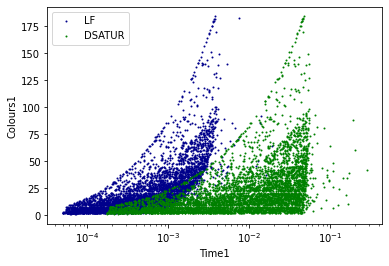

In [ ]:
#LFwins = df_gc_instances[df_gc_instances['Colours0'] < df_gc_instances['Colours1']]

ax1 = df_gc_instances.plot.scatter(x='Time0', y='Colours0', c='DarkBlue', s=1)
ax2 = df_gc_instances.plot.scatter(x='Time1', y='Colours1', color='g',s=1, ax=ax1)  
#x1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(["LF" , "DSATUR"])

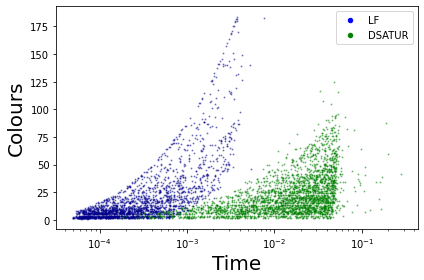

In [10]:
LFwins1 = df_gc_instances[df_gc_instances['Colours0'] < df_gc_instances['Colours1']]
LFwins2 = df_gc_instances[(df_gc_instances['Colours0'] == df_gc_instances['Colours1']) & (df_gc_instances['Time0'] < df_gc_instances['Time1'])]
LFwins = pd.concat([LFwins1,LFwins2])
ax1 = LFwins.plot.scatter(x='Time0', y='Colours0', c='DarkBlue',alpha=0.4, s=1)
DSATURwins1 = df_gc_instances[df_gc_instances['Colours0'] > df_gc_instances['Colours1']]
DSATURwins2 = df_gc_instances[(df_gc_instances['Colours0'] == df_gc_instances['Colours1']) & (df_gc_instances['Time0'] > df_gc_instances['Time1'])]
DSATURwins = pd.concat([DSATURwins1,DSATURwins2])
ax2 = DSATURwins.plot.scatter(x='Time1', y='Colours1', color='g',s=1,alpha=0.4, ax=ax1)  
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(["LF" , "DSATUR"])
h1 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='b', linestyle='None')
h2 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='g', linestyle='None')
plt.legend([h1, h2], ["LF" , "DSATUR"], loc="upper right", markerscale=1,
           scatterpoints=1, fontsize=10)

#legend = plt.legend(loc='upper right',numpoints=1,  fontsize=10)
#legend.legendHandles[0]._legmarker.set_markersize(15)
#legend.legendHandles[1]._legmarker.set_markersize(15)
plt.xlabel("Time", size =20)
plt.ylabel("Colours" ,size = 20)
plt.savefig("GCinstances.png", dpi=600 , bbox_inches='tight')
plt.tight_layout()

In [12]:
knap_frame = pd.read_csv('/content/knapsackNoTies.csv')
instanceNames = knap_frame.Instance
labels = knap_frame.Label

In [ ]:
knap_frame.head()

,Unnamed: 0,Instance,DominantPairs,SmallerBetterPairs,CapacityFraction,CapFracDistanceFromOneHalf,CorrelationCoefficient,ApproximationGap,CoeffVarWeights,CoeffVarProfits,...,ReducedPolyfitLinear,ReducedPolyfitQuadratic,ReducedPolyfitCubic,ReducedBeforeAfterSplitRatio,ReducedGreedyUnusedCapacity,algo_Expknap,algo_Minknap,algo_Combo,Source,Label
0,0,0_knapPI_11_1000_1000_1_new,0.527556,0.689762,0.000248,0.999505,0.032669,0.727273,0.326433,0.483294,...,0.027057,0.000000,0.0,0.0,0.009857,3.910000e-06,0.000195,0.000196,Pisinger_hard,1
1,1,0_knapPI_11_100_1000_1_new,0.552323,0.705859,0.002492,0.995016,-0.060430,0.363636,0.298897,0.461156,...,0.973876,0.973853,0.0,0.0,0.004630,7.390000e-07,0.000187,0.000193,Pisinger_hard,1
2,2,0_knapPI_11_2000_1000_1_new,0.540033,0.701131,0.000123,0.999753,0.004407,0.727273,0.326540,0.483716,...,0.196165,0.056032,0.0,0.0,0.009857,5.760000e-06,0.000196,0.000202,Pisinger_hard,1
3,3,0_knapPI_11_200_1000_1_new,0.571809,0.726030,0.001239,0.997521,-0.118049,0.727273,0.314198,0.462633,...,0.000000,0.000000,0.0,0.0,0.000000,8.840000e-07,0.000190,0.000189,Pisinger_hard,1
4,4,0_knapPI_11_500_1000_1_new,0.532529,0.691158,0.000498,0.999004,-0.009134,0.727273,0.323977,0.476838,...,0.003322,0.000000,0.0,0.0,0.009857,1.490000e-06,0.000190,0.000192,Pisinger_hard,1


In [13]:
ExpWin = knap_frame[knap_frame["Label"] == 1]
ExpWin = ExpWin.head(2500)
ComboWin = knap_frame[knap_frame["Label"] == 2]
ComboWin = ComboWin.head(2500)

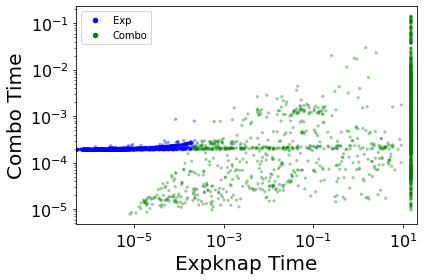

In [15]:
ax = ExpWin.plot.scatter("algo_Expknap","algo_Combo", s=10, c='b', alpha=0.4, edgecolors='none')
ax2 = ComboWin.plot.scatter("algo_Expknap","algo_Combo", s=10, c='g', alpha=0.4, edgecolors='none', ax=ax)
ax.set_xlabel('Expknap Time',fontsize=20)
ax.set_ylabel('Combo Time',fontsize=20)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
#fig.suptitle("Knapsack Instances", fontsize=24)
ax.set_xlim(0.0000005,20)
ax.set_yscale('log')
ax.set_xscale('log')
h1 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='b', linestyle='None')
h2 = Line2D([0], [0], marker='o', markersize=np.sqrt(20), color='g', linestyle='None')
plt.legend([h1, h2], ["Exp" , "Combo"], loc="upper left", markerscale=1,
           scatterpoints=1, fontsize=10)
plt.savefig("KPinstances.png", dpi=600 , bbox_inches='tight')
plt.tight_layout()